<a href="https://colab.research.google.com/github/Sujay2108/Assignments/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
dummy = pd.get_dummies(df.State)
dummy

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [11]:
merge = pd.concat([df,dummy],axis='columns')
final = merge.drop(['State'],axis = 'columns')
final.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
y=final['Profit']
x=final.drop('Profit',axis='columns')
print(x.shape)
print(y.shape)

(50, 6)
(50,)


In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=5)
mymodel = LinearRegression()
mymodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
ypred = mymodel.predict(xtest)
print(ypred)
print(ytest)

[ 71165.92121161  98991.88050579 155658.78699148 111109.64339251
 100180.12553466 128692.30008061 181975.81887445  57805.09379192
 172178.68837138 116394.2972235   94778.512652   171783.69240132
  97372.02912332]
42     71498.49
29    101004.64
6     156122.51
19    122776.86
28    103282.38
17    125370.37
2     191050.39
43     69758.98
3     182901.99
21    111313.02
31     97483.56
4     166187.94
32     97427.84
Name: Profit, dtype: float64


In [29]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(ytest,ypred)
print(score)

0.9701993496424502


In [36]:
mymodel.coef_

array([ 7.81494897e-01, -2.84329206e-02,  3.85924982e-02,  7.65031203e+02,
        2.45868839e+02, -1.01090004e+03])

In [37]:
mymodel.intercept_

48948.84340149311

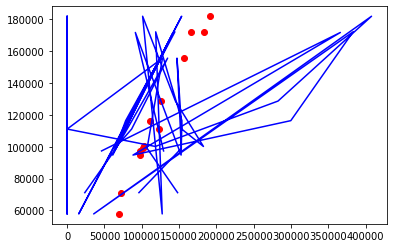

In [35]:
plt.scatter(ytest,ypred,color='r')
plt.plot(xtest,mymodel.predict(xtest),color = 'blue')
plt.show()